In [7]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.contrib.learn as learn
import numpy as np
from tensorflow.contrib.learn.python.learn.metric_spec import MetricSpec
                

In [8]:
# Setting the desired TensorFlow output level
tf.logging.set_verbosity(tf.logging.INFO)

path = "./data/"
    
filename = os.path.join(path,"iris.csv")    
df = pd.read_csv(filename,na_values=['NA','?'])
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
# Encoding a numeric column as zscores
def encode_numeric_zscore(df,name,mean=None,sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name]-mean)/sd

# Encoding feature vector
encode_numeric_zscore(df,'petal_w')
encode_numeric_zscore(df,'petal_l')
encode_numeric_zscore(df,'sepal_w')
encode_numeric_zscore(df,'sepal_l') 
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,-0.897674,1.015602,-1.335752,-1.311052,Iris-setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,Iris-setosa
2,-1.380727,0.327318,-1.392399,-1.311052,Iris-setosa
3,-1.501490,0.097889,-1.279104,-1.311052,Iris-setosa
4,-1.018437,1.245030,-1.335752,-1.311052,Iris-setosa
5,-0.535384,1.933315,-1.165809,-1.048667,Iris-setosa
6,-1.501490,0.786174,-1.335752,-1.179859,Iris-setosa
7,-1.018437,0.786174,-1.279104,-1.311052,Iris-setosa
8,-1.743017,-0.360967,-1.335752,-1.311052,Iris-setosa
9,-1.139200,0.097889,-1.279104,-1.442245,Iris-setosa


In [10]:
# Encodun text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df,name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

species = encode_text_index(df,"species")
num_classes = len(species)
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0
5,-0.535384,1.933315,-1.165809,-1.048667,0
6,-1.501490,0.786174,-1.335752,-1.179859,0
7,-1.018437,0.786174,-1.279104,-1.311052,0
8,-1.743017,-0.360967,-1.335752,-1.311052,0
9,-1.139200,0.097889,-1.279104,-1.442245,0


In [11]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df,target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encode to int for classification, float otherwise.
    if target_type in (np.int64, np.int32):
        # Classification
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.int32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.float32)


# Create the x | Y -side  of the training
x, y = to_xy(df,'species')


In [20]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [23]:
def get_model_dir(name,erase):
    base_path = os.path.join(".","dnn")
    model_dir = os.path.join(base_path,name)
    os.makedirs(model_dir,exist_ok=True)
    if erase and len(model_dir)>4 and os.path.isdir(model_dir):
        shutil.rmtree(model_dir,ignore_errors=True) # be careful, this deletes everything below the specified path
    return model_dir

# Get/clear a directory to store the neural network to
model_dir = get_model_dir('iris',True)

In [24]:
# Create a deep neural network with 3 hidden layers of 10, 20, 5
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    model_dir= model_dir,
    config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1),
    hidden_units=[10, 20, 5], n_classes=num_classes, feature_columns=feature_columns)


INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', 'tf_random_seed': None, 'save_summary_steps': 100, '_environment': 'local', '_master': '', 'save_checkpoints_secs': 1, '_task_id': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4963429f60>, '_task_type': None, 'keep_checkpoint_max': 5, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_ps_replicas': 0, 'save_checkpoints_steps': None}


In [25]:
# Early stopping
validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test,
    y_test,
    every_n_steps=500,
    #metrics=validation_metrics,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=50)


Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.


In [26]:
# Fit/train neural network
classifier.fit(x_train, y_train,monitors=[validation_monitor],steps=10000)
    

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Summary name dnn/hiddenlayer_0:fraction_of_zero_values is illegal; using

In [28]:
from sklearn import metrics

# Set the desired TensorFlow output level 
tf.logging.set_verbosity(tf.logging.ERROR)

# Evaluate success using accuracy
pred = list(classifier.predict(x_test, as_iterable=True))
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9473684210526315


In [34]:
# Set the desired TensorFlow output
tf.logging.set_verbosity(tf.logging.ERROR)

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = list(classifier.predict_proba(x_test, as_iterable=True))

print("Numpy array of predictions")
print(pred[0]*100)
print("\n")

#print("As percent probability")
#display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

Numpy array of predictions
[ 99.9995   0.       0.0005]


Log loss score: 0.16742906725971882


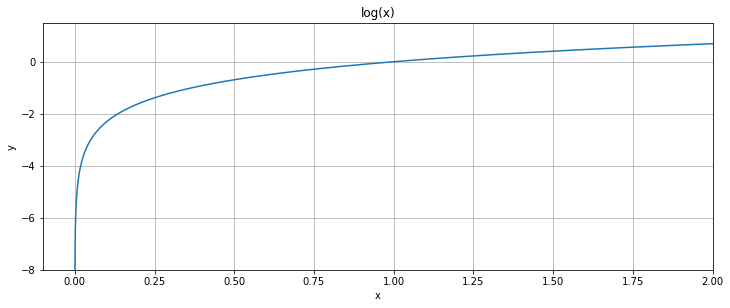

In [35]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

t = arange(1e-5, 5.0, 0.00001)
#t = arange(1.0, 5.0, 0.00001) # computer scientists
#t = arange(0.0, 1.0, 0.00001)  # data     scientists

fig = figure(1,figsize=(12, 10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()